In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
})

plt.style.use(['seaborn-v0_8-colorblind'])

In [4]:
model_names = {
    "fedlr": "FedLR",
    "fedfor": "FedFor",
}

dataset_names = {
    "adult": "Adult",
    "huga": "HuGaDB",
    "kdd": "KDD99",
    "spambase": "Spambase",
}

In [5]:
df = pd.read_csv("final/lodo_estimator_results.csv")
df = df.rename(columns={"target_dataset": "dataset", "frequency_pred": "frequency_lodo"})
dfa = pd.read_csv("final/split_estimator_results.csv")
df["frequency_split"] = dfa["frequency_pred"]
df["dataset"] = df["dataset"].map(dataset_names)
df

,model,n_clients,comm_cost,dataset,accuracy,precision,recall,f1_score,frequency_true,frequency_lodo,frequency_split
0,fedlr,10,0.0000,Adult,0.015,0.015,1.0,0.029557,0.015,1.0,0.00
1,fedlr,10,0.0000,HuGaDB,0.140,0.000,0.0,0.000000,0.860,0.0,0.94
2,fedlr,10,0.0000,KDD99,0.005,0.005,1.0,0.009950,0.005,1.0,0.00
3,fedlr,10,0.0000,Spambase,0.005,0.000,0.0,0.000000,0.995,0.0,1.00
4,fedlr,10,0.0125,Adult,0.000,0.000,0.0,0.000000,0.000,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
395,fedfor,100,0.0500,Spambase,0.550,0.000,0.0,0.000000,0.450,0.0,0.41
396,fedfor,100,0.1000,Adult,1.000,0.000,0.0,0.000000,0.000,0.0,0.00
397,fedfor,100,0.1000,HuGaDB,0.975,0.000,0.0,0.000000,0.025,0.0,0.00
398,fedfor,100,0.1000,KDD99,1.000,0.000,0.0,0.000000,0.000,0.0,0.00


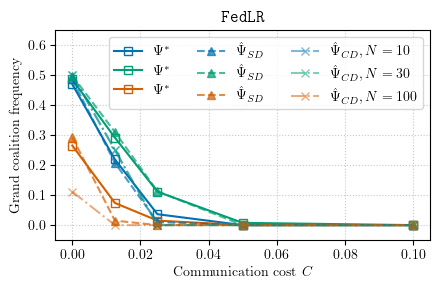

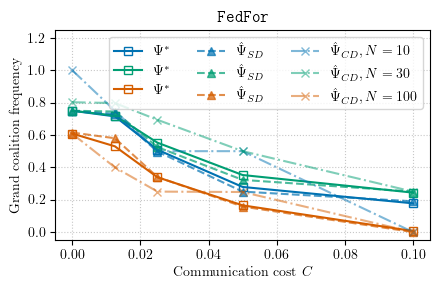

In [6]:
for model in df['model'].unique():
    df_model = df[df['model'] == model]
    plt.figure(figsize=(4.5, 3))

    # suboptimal computation but right order in the legend
    for i, n_clients in enumerate((10, 30, 100)):
        df_nc = df_model[df_model['n_clients'] == n_clients].groupby(
            'comm_cost'
        )[['frequency_true']].mean().reset_index()
        plt.plot(df_nc['comm_cost'], df_nc['frequency_true'], marker='s', label=r'${\Psi}^{*}$', color=f'C{i}', mfc='none')

    for i, n_clients in enumerate((10, 30, 100)):
        df_nc = df_model[df_model['n_clients'] == n_clients].groupby(
            'comm_cost'
        )[['frequency_split']].mean().reset_index()
        plt.plot(df_nc['comm_cost'], df_nc['frequency_split'], "--", marker='^', label=r'$\hat{\Psi}_{SD}$', color=f'C{i}', alpha=0.7)
    
    for i, n_clients in enumerate((10, 30, 100)):
        df_nc = df_model[df_model['n_clients'] == n_clients].groupby(
            'comm_cost'
        )[['frequency_lodo']].mean().reset_index()
        plt.plot(df_nc['comm_cost'], df_nc['frequency_lodo'], "-.", marker='x', label=r'$\hat{\Psi}_{CD},'+f"N={n_clients}"+'$', color=f'C{i}', alpha=0.5)
    

    plt.xlabel('Communication cost $C$')
    # plt.xticks(df_model['comm_cost'].unique(), [f'{cc:.3f}' for cc in df_model['comm_cost'].unique()])
    plt.ylabel('Grand coalition frequency')
    plt.title(r"\tt{"+f'{model_names[model]}'+r"}")
    plt.legend(ncol=3)
    plt.grid(linestyle=':', alpha=0.7)
    if model == "fedfor":
        plt.ylim(-0.05, 1.25)
    elif model == "fedlr":
        plt.ylim(-0.05, 0.65)
    plt.tight_layout()
    plt.savefig(f'final/{model}_frequency_vs_comm_cost.pdf')
    plt.show()

In [7]:
df[df['comm_cost'] < 0.05].groupby(['n_clients', 'comm_cost'])['accuracy'].mean().reset_index().sort_values(by='accuracy', ascending=False).head(10)

,n_clients,comm_cost,accuracy
28,100,0.0125,0.753125
29,100,0.0250,0.721875
27,100,0.0000,0.703750
26,90,0.0250,0.673750
23,80,0.0250,0.671250
24,90,0.0000,0.669375
17,60,0.0250,0.623125
16,60,0.0125,0.618750
22,80,0.0125,0.592500
21,80,0.0000,0.570625


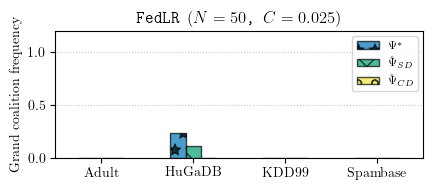

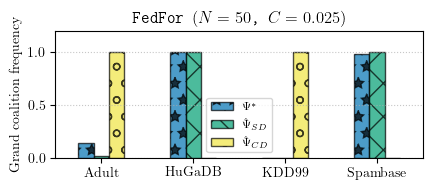

In [28]:
comm_cost = 0.025
n_clients = 50

df_ = df[(df["comm_cost"] == comm_cost) & (df['n_clients'] == n_clients)].reset_index(drop=True)


for model in df_['model'].unique():
    plt.figure(figsize=(4.5, 2))
    dfx = df_[df_["model"] == model].groupby('dataset')[['frequency_true', 'frequency_split', 'frequency_lodo']].mean().reset_index()
    # print(dfx)

    ax = dfx.plot(
        x='dataset',
        y=['frequency_true', 'frequency_split', 'frequency_lodo'],
        kind='bar',
        ax=plt.gca(),
        rot=0,
        label=[r'${\Psi}^{*}$', r'$\hat{\Psi}_{SD}$', r'$\hat{\Psi}_{CD}$'],
        color=['C0', 'C1', 'C4'],
        alpha=0.7,
        edgecolor='black',
    )

    bars = ax.patches
    hatches = ''.join(h*len(dfx) for h in '*xo')
    
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
    plt.title(r"\tt{"+f'{model_names[model]}'+r"}" + f' $(N={n_clients}$, $C={comm_cost})$')
    plt.xlabel("")
    plt.ylim(0, 1.2)
    plt.legend(fontsize=8)
    plt.ylabel('Grand coalition frequency')
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    pretty_comm_cost = f'{comm_cost:.4f}'.replace('.', '_')
    plt.savefig(f'final/{model}_frequency_barplot_{pretty_comm_cost}.pdf')
    plt.show()
